<h3> In this project i'm hoing to analyze the url data from the security dataset and use it to train and test the classification models to identify Malicious and Benign Websites </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading data from .csv file to dataframe
df = pd.read_csv('security.csv')

In [4]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CACHE_CONTROL', 'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATE_CITY',
       'WHOIS_REG_YEAR', 'UPDATE_YEAR', 'DOMAIN_NAME',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'UDP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'TIPO'],
      dtype='object')

<h3> I'm going to expolre the dataset to see if any data is missing and if we can see correlation between some data </h3>

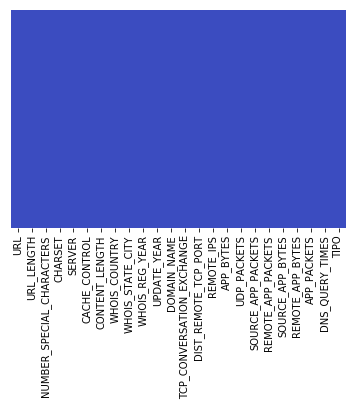

In [5]:
# Using heatmap plot to see if any of the column are missing
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [98]:
df.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CACHE_CONTROL,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,...,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
0,B0_113,17,6,ISO-8859-1,nginx,None,162,US,California,1997,...,3,3812,0,39,37,18784,4380,39,8,0
1,B0_403,17,6,UTF-8,Apache/2.2.0 (Fedora),"max-age=269, must-revalidate",124140,US,Texas,1996,...,5,4278,0,61,62,129889,4586,61,4,0
2,B0_2064,18,7,UTF-8,nginx,None,11260,CN,Shanxi,2017,...,9,894,0,11,13,838,894,11,0,0
3,B0_462,18,6,iso-8859-1,Apache/2,None,345,US,Colorado,2002,...,3,1189,0,14,13,8559,1327,14,2,0
4,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,None,324,US,Florida,1997,...,0,0,0,0,0,0,0,0,0,0
5,B0_1013,20,6,utf-8,Apache,"no-store, no-cache, must-revalidate, post-chec...",11260,US,Kansas,2007,...,0,0,0,0,0,0,0,0,0,0
6,B0_1102,20,6,us-ascii,Microsoft-HTTPAPI/2.0,None,324,US,Colorado,2016,...,0,0,0,0,0,0,0,0,0,0
7,B0_22,20,7,utf-8,Apache,"no-cache, no-store, must-revalidate, max-age=0",13716,UK,Nottingham,2002,...,8,1492,0,20,20,2334,1784,20,4,0
8,B0_482,20,6,ISO-8859-1,nginx,"no-store, no-cache, must-revalidate, post-chec...",3692,US,Tennessee,2002,...,4,3946,0,35,29,16408,4746,35,10,0
9,M0_71,21,7,ISO-8859-1,Apache/2.4.23,None,957,CA,Quebec,2000,...,1,717,0,11,10,1960,1011,11,4,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 24 columns):
URL                          1611 non-null object
URL_LENGTH                   1611 non-null int64
NUMBER_SPECIAL_CHARACTERS    1611 non-null int64
CHARSET                      1611 non-null object
SERVER                       1611 non-null object
CACHE_CONTROL                1611 non-null object
CONTENT_LENGTH               1611 non-null int64
WHOIS_COUNTRY                1611 non-null object
WHOIS_STATE_CITY             1611 non-null object
WHOIS_REG_YEAR               1611 non-null int64
UPDATE_YEAR                  1611 non-null int64
DOMAIN_NAME                  1611 non-null object
TCP_CONVERSATION_EXCHANGE    1611 non-null int64
DIST_REMOTE_TCP_PORT         1611 non-null int64
REMOTE_IPS                   1611 non-null int64
APP_BYTES                    1611 non-null int64
UDP_PACKETS                  1611 non-null int64
SOURCE_APP_PACKETS           1611 non-null int64
REMO

In [10]:
# Checking the numbers of unique values in each column
df.nunique()

URL                          1611
URL_LENGTH                    140
NUMBER_SPECIAL_CHARACTERS      30
CHARSET                         9
SERVER                        118
CACHE_CONTROL                 142
CONTENT_LENGTH                567
WHOIS_COUNTRY                  43
WHOIS_STATE_CITY              160
WHOIS_REG_YEAR                 27
UPDATE_YEAR                     9
DOMAIN_NAME                   933
TCP_CONVERSATION_EXCHANGE      99
DIST_REMOTE_TCP_PORT           65
REMOTE_IPS                     17
APP_BYTES                     734
UDP_PACKETS                     1
SOURCE_APP_PACKETS            107
REMOTE_APP_PACKETS            107
SOURCE_APP_BYTES              782
REMOTE_APP_BYTES              728
APP_PACKETS                   107
DNS_QUERY_TIMES                 9
TIPO                            2
dtype: int64

In [11]:
df['WHOIS_COUNTRY'].unique()

array(['US', 'CN', 'UK', 'CA', 'RU', 'AU', 'PA', 'SE', 'IN', 'LU', 'JP',
       'FR', 'NL', 'UG', 'SI', 'KR', 'IL', 'AT', 'BG', 'IR', 'CZ', 'PH',
       'BE', 'NO', 'TR', 'BS', 'KY', 'LV', 'DE', 'SC', 'BVI', 'UA', 'CH',
       'ZA', 'PK', 'IT', 'BR', 'CY', 'us', 'BY', 'ES', 'IE', 'UY'], dtype=object)

In [13]:
df['WHOIS_STATE_CITY'].unique()

array(['California', 'Texas', 'Shanxi', 'Colorado', 'Florida', 'Kansas',
       'Nottingham', 'Tennessee', 'Quebec', 'Novosibirskaya obl.',
       'Victoria', 'Oregon', 'Alberta', 'Panama', 'Goteborg', 'Ontario',
       'Arizona', 'London', 'Wisconsin', 'Andhra Pradesh', 'Montreal',
       'Root Sur Syre', 'Virginia', 'New York', 'Vermont', 'New Mexico',
       'British Columbia', 'Massachusetts', 'Tokyo', 'West Midlands',
       'Saint Petersburg', 'Utah', 'Kentucky', 'Maryland', 'Pennsylvania',
       'Wyoming', 'TEXAS', 'Queensland', 'Ohio', 'Moscow', 'Paris',
       'Utrecht', 'New Hampshire', 'Uttar Pardesh', 'Washington', 'kireka',
       'Illinois', 'Missouri', 'Osaka', 'Michigan', 'South Carolina',
       'Gerogia', 'Flen', 'New Jersey', 'wisconsin', 'Nevada', 'Haryana',
       'Beijing', 'Maribor', 'Seoul', 'Fukuoka', 'Rosh Hain',
       'Krasnoyarsk', 'Maine', 'Maharashtra', 'Vienna', 'shandong',
       'Veliko Tarnovo', 'Dublin', 'Praha', 'Bejingshi', 'liaoningsheng',
      

In [14]:
df['WHOIS_REG_YEAR'].unique()

array([1997, 1996, 2017, 2002, 2007, 2016, 2000, 2013, 1999, 2003, 2008,
       2009, 2005, 2001, 2006, 1995, 1998, 2011, 2004, 2010, 1994, 2015,
       2012, 2014, 1993, 1992, 1990], dtype=int64)

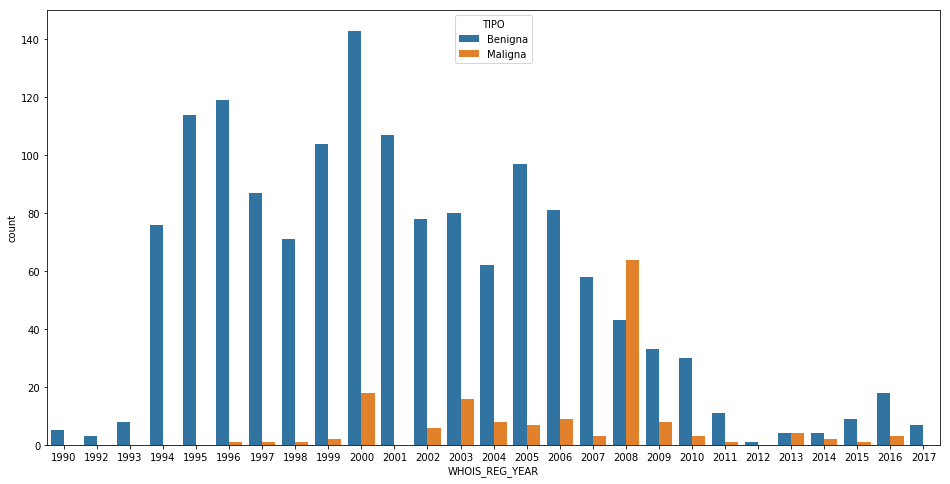

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='WHOIS_REG_YEAR', hue='TIPO')

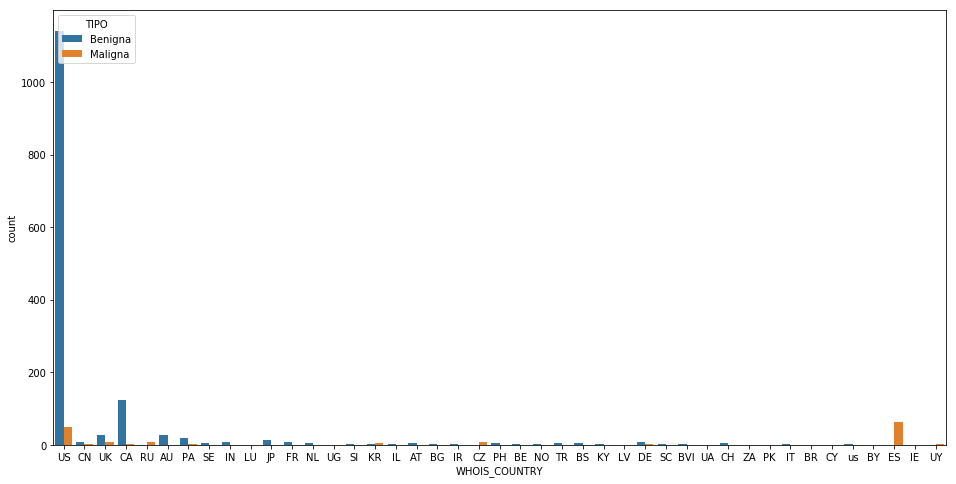

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='WHOIS_COUNTRY', hue='TIPO')

In [25]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CACHE_CONTROL', 'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATE_CITY',
       'WHOIS_REG_YEAR', 'UPDATE_YEAR', 'DOMAIN_NAME',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'UDP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'TIPO'],
      dtype='object')

In [22]:
df.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CACHE_CONTROL,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,...,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
0,B0_113,17,6,ISO-8859-1,nginx,None,162,US,California,1997,...,3,3812,0,39,37,18784,4380,39,8,Benigna
1,B0_403,17,6,UTF-8,Apache/2.2.0 (Fedora),"max-age=269, must-revalidate",124140,US,Texas,1996,...,5,4278,0,61,62,129889,4586,61,4,Benigna
2,B0_2064,18,7,UTF-8,nginx,None,11260,CN,Shanxi,2017,...,9,894,0,11,13,838,894,11,0,Benigna
3,B0_462,18,6,iso-8859-1,Apache/2,None,345,US,Colorado,2002,...,3,1189,0,14,13,8559,1327,14,2,Benigna
4,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,None,324,US,Florida,1997,...,0,0,0,0,0,0,0,0,0,Benigna


In [120]:
# Numbers of unique values in string columns:

df[['URL','DOMAIN_NAME','CHARSET', 'SERVER', 'CACHE_CONTROL','WHOIS_COUNTRY','WHOIS_STATE_CITY']].nunique()

URL                 1611
DOMAIN_NAME          933
CHARSET                9
SERVER               118
CACHE_CONTROL        142
WHOIS_COUNTRY         43
WHOIS_STATE_CITY     160
dtype: int64

In [30]:
# Since the target column "TIPO" currently has string values i'm going to write a function to replace them with 1's and 0's

def target(tipo):
    if tipo == "Benigna":
        return 0
    else:
        return 1

In [33]:
# Applying function to the column:

df['TIPO'] = df['TIPO'].apply(target)

In [34]:
df['TIPO'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: TIPO, dtype: int64

In [118]:
# I'm going to create a heatmap based on df data to see if there's any clear correlation between features and category:

corr = df.corr()

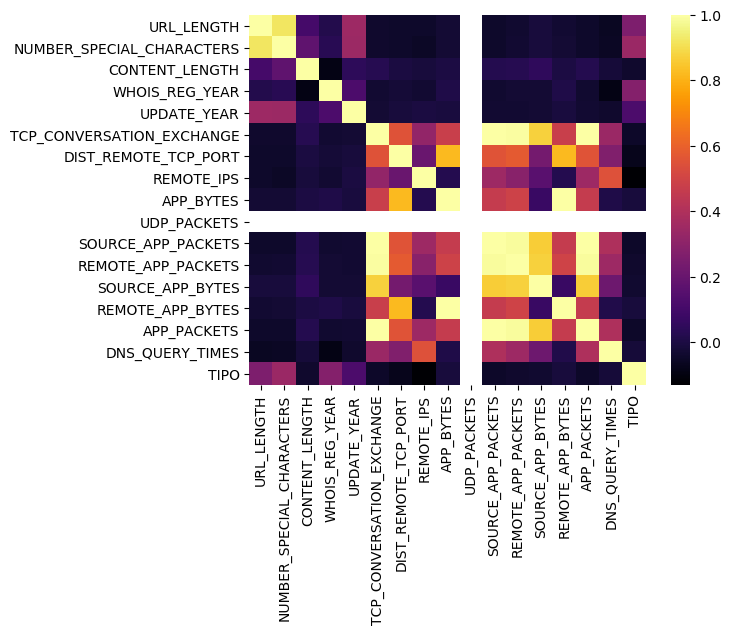

In [119]:
# As we can see there's no clear strong correlation between featues and target class

sns.heatmap(corr, cmap="inferno")

In [59]:
# I'm going to create dummy values out of string columns to be able to use it for classification using ML:

moddf = pd.get_dummies(df, columns=['URL','DOMAIN_NAME','CHARSET', 'SERVER', 'CACHE_CONTROL','WHOIS_COUNTRY','WHOIS_STATE_CITY'])

In [60]:
moddf.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'WHOIS_REG_YEAR', 'UPDATE_YEAR', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'UDP_PACKETS',
       'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES',
       'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'TIPO',
       'URL_B0_1', 'URL_B0_10', 'URL_B0_100', 'URL_B0_1000', 'URL_B0_1001',
       'URL_B0_1002', 'URL_B0_1004', 'URL_B0_1005', 'URL_B0_1006',
       'URL_B0_1007', 'URL_B0_1008', 'URL_B0_1009', 'URL_B0_101',
       'URL_B0_1010', 'URL_B0_1011', 'URL_B0_1012', 'URL_B0_1013',
       'URL_B0_1014', 'URL_B0_1015', 'URL_B0_1016', 'URL_B0_1017',
       'URL_B0_1019', 'URL_B0_102', 'URL_B0_1022', 'URL_B0_1023',
       'URL_B0_1025', 'URL_B0_1026', 'URL_B0_1027', 'URL_B0_1028',
       'URL_B0_1029', 'URL_B0_103', 'URL_B0_1030', 'URL_B0_1031',
       'URL_B0_1033', 'URL_B0_1034', 'URL_B0_1035', 'URL_B0_1036',
       'URL_B0_1037', 'URL_B0_1038', 'URL

<h3> Now as I've modified the dataset and created new features based on the string column values I can try to use ML for classification. </h3>

<h3> Firts I'll use the logistic regression: </h3>

In [49]:
# Splitting data into training and testing sets using train_test_split
from sklearn.cross_validation import train_test_split

In [63]:
X = moddf.drop(axis=1, columns=['TIPO'])
X.head(5)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REG_YEAR,UPDATE_YEAR,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,UDP_PACKETS,...,WHOIS_STATE_CITY_Worcs,WHOIS_STATE_CITY_Wyoming,WHOIS_STATE_CITY_Zollikon,WHOIS_STATE_CITY_Zug,WHOIS_STATE_CITY_Zurich,WHOIS_STATE_CITY_kireka,WHOIS_STATE_CITY_liaoningsheng,WHOIS_STATE_CITY_shandong,WHOIS_STATE_CITY_widestep@mail.ru,WHOIS_STATE_CITY_wisconsin
0,17,6,162,1997,2013,31,22,3,3812,0,...,0,0,0,0,0,0,0,0,0,0
1,17,6,124140,1996,2017,57,2,5,4278,0,...,0,0,0,0,0,0,0,0,0,0
2,18,7,11260,2017,2017,11,6,9,894,0,...,0,0,0,0,0,0,0,0,0,0
3,18,6,345,2002,2016,12,0,3,1189,0,...,0,0,0,0,0,0,0,0,0,0
4,19,6,324,1997,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y = moddf['TIPO']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: TIPO, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logr = LogisticRegression()

In [68]:
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
pred = logr.predict(X_test)

In [73]:
# Importing metrics modules to evaluate the the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       434
          1       0.89      0.66      0.76        50

avg / total       0.95      0.96      0.95       484



[[430   4]
 [ 17  33]]
0.956611570248


<h3> Now i'm going to try to use the KNN model to see if it'll ahve better results than logistic regression </h3>

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [76]:
# Using standard scaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

In [77]:
sclr_train = X

In [78]:
scaler.fit(sclr_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
scaled_features = scaler.transform(sclr_train)

In [81]:
# To see the results of standartizatiob i'll create a dataframe from scaled features
df_features = pd.DataFrame(scaled_features,columns=sclr_train.columns)
df_features.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REG_YEAR,UPDATE_YEAR,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,UDP_PACKETS,...,WHOIS_STATE_CITY_Worcs,WHOIS_STATE_CITY_Wyoming,WHOIS_STATE_CITY_Zollikon,WHOIS_STATE_CITY_Zug,WHOIS_STATE_CITY_Zurich,WHOIS_STATE_CITY_kireka,WHOIS_STATE_CITY_liaoningsheng,WHOIS_STATE_CITY_shandong,WHOIS_STATE_CITY_widestep@mail.ru,WHOIS_STATE_CITY_wisconsin
0,-1.458135,-1.103988,-0.479625,-0.893011,-2.877258,0.378934,0.760888,0.010254,0.012564,0.0,...,-0.024922,-0.066061,-0.035256,-0.035256,-0.024922,-0.024922,-0.024922,-0.024922,-0.024922,-0.035256
1,-1.458135,-1.103988,4.913007,-1.084701,0.682851,1.019737,-0.159410,0.600252,0.020474,0.0,...,-0.024922,-0.066061,-0.035256,-0.035256,-0.024922,-0.024922,-0.024922,-0.024922,-0.024922,-0.035256
2,-1.422615,-0.891170,0.003101,2.940807,0.682851,-0.113991,0.024650,1.780248,-0.036971,0.0,...,-0.024922,-0.066061,-0.035256,-0.035256,-0.024922,-0.024922,-0.024922,-0.024922,-0.024922,-0.035256
3,-1.422615,-1.103988,-0.471665,0.065444,-0.207176,-0.089345,-0.251440,0.010254,-0.031964,0.0,...,-0.024922,-0.066061,-0.035256,-0.035256,-0.024922,-0.024922,-0.024922,-0.024922,-0.024922,-0.035256
4,-1.387096,-1.103988,-0.472579,-0.893011,0.682851,-0.385100,-0.251440,-0.874742,-0.052148,0.0,...,-0.024922,-0.066061,-0.035256,-0.035256,-0.024922,-0.024922,-0.024922,-0.024922,-0.024922,-0.035256


In [82]:
# Splitting scaled data into training and testing sets using train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,test_size=0.30, random_state=100)

In [89]:
# Since the accuracy of the model depends on the number of selected neighbours let's create loop to check multiple values
# We'll evaluate the accuracy of the models based on the error rate

error_rate = []


for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

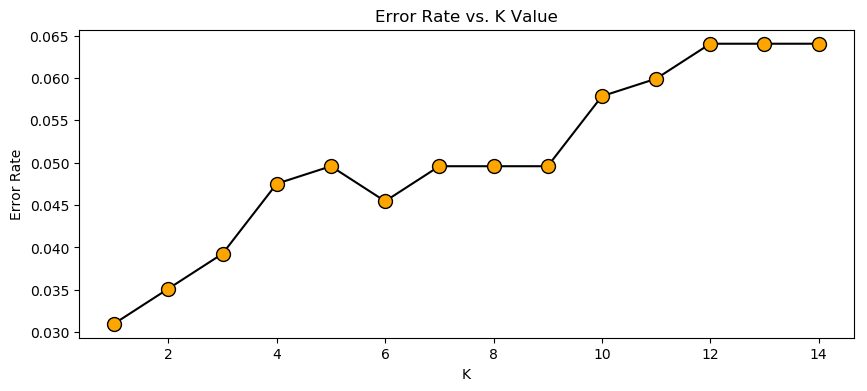

In [110]:
# Building a graph based on the error rate data"

plt.figure(figsize=(10,4))
plt.plot(range(1,15),error_rate,color='black', linestyle='-', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [91]:
# Based on the graph we can see that n_neighbours=1 has the lowest error rate
knn = KNeighborsClassifier(n_neighbors=1)

In [92]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [93]:
knnpred = knn.predict(X_test)

In [94]:
# Evaluating the accuracy\precision of the K-Nearest Neighbours model"

print(classification_report(y_test, knnpred))
print('\n')
print(confusion_matrix(y_test, knnpred))
print(accuracy_score(y_test, knnpred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       434
          1       0.97      0.72      0.83        50

avg / total       0.97      0.97      0.97       484



[[433   1]
 [ 14  36]]
0.969008264463


In [124]:
print("Logistic Regression results:")
print('\n')
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print('\n')
print('\n')
print("KNN results:")
print('\n')
print(classification_report(y_test, knnpred))
print('\n')
print(confusion_matrix(y_test, knnpred))
print(accuracy_score(y_test, knnpred))

# TP – True Positives;FP – False Positives
# Precision – Accuracy of positive predictions. Precision = TP/(TP + FP)

# FN – False Negatives
# Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified. Recall = TP/(TP+FN)

Logistic Regression results:


             precision    recall  f1-score   support

          0       0.96      0.99      0.98       434
          1       0.89      0.66      0.76        50

avg / total       0.95      0.96      0.95       484



[[430   4]
 [ 17  33]]
0.956611570248




KNN results:


             precision    recall  f1-score   support

          0       0.97      1.00      0.98       434
          1       0.97      0.72      0.83        50

avg / total       0.97      0.97      0.97       484



[[433   1]
 [ 14  36]]
0.969008264463
